## Import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import requests
%matplotlib inline

## Loading the dataset 

In [2]:
data = pd.read_csv('UberDataset.csv')

In [3]:
data

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Karachi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site


## Data understanding 

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [8]:
data.shape

(1156, 7)

In [9]:
data.describe(include = 'object')

,START_DATE,END_DATE,CATEGORY,START,STOP,PURPOSE
count,1156,1155,1155,1155,1155,653
unique,1155,1154,2,177,188,10
top,6/28/2016 23:34,6/28/2016 23:59,Business,Cary,Cary,Meeting
freq,2,2,1078,201,203,187


## Explore missing values

In [42]:
data.isnull().sum()

START_DATE      0
END_DATE        1
CATEGORY        1
START           1
STOP            1
MILES           0
PURPOSE       503
dtype: int64

In [4]:
data['PURPOSE'] = data['PURPOSE'].fillna('unknown')
data.dropna(inplace=True)

## Data Preprocessing

In [5]:
# converting START_DATE and END_DATE into datetime format
data['START_DATE'] = pd.to_datetime(data['START_DATE'])
data['END_DATE'] = pd.to_datetime(data['END_DATE'])

In [6]:
# create time column 
data['TIME_DAY'] = data['START_DATE'].dt.hour
data['TIME_OF_DAY'] = data['START_DATE'].dt.hour

In [7]:
# create time of day column 
data['TIME_OF_DAY'] = pd.cut(x = data['TIME_OF_DAY'] , bins = [0, 6, 11, 17, 21, 24] , labels=['Night', 'Morning', 'Afternoon', 'Evening', 'Night'], ordered= False)

In [8]:
# create month column
data['MONTH'] = data['START_DATE'].dt.month
month_label = { 1:'Jan', 2:'Feb', 3:'Mar', 4: 'April', 5: 'May', 6: 'June', 7: 'July', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec' }
data['MONTH'] = data['MONTH'].map(month_label)

In [9]:
data['DAY_OF_THE_RIDE'] = data['START_DATE'].dt.weekday
day_label = {0: 'Mon', 1: 'Tues', 2: 'Wed', 3: 'Thus', 4: 'Fri', 5: 'Sat', 6: 'Sun'}
data['DAY_OF_THE_RIDE'] = data['DAY_OF_THE_RIDE'].map(day_label)

In [10]:
data

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,TIME_DAY,TIME_OF_DAY,MONTH,DAY_OF_THE_RIDE
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,21,Evening,Jan,Fri
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,unknown,1,Night,Jan,Sat
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,20,Evening,Jan,Sat
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,17,Afternoon,Jan,Tues
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,14,Afternoon,Jan,Wed
...,...,...,...,...,...,...,...,...,...,...,...
1150,2016-12-31 01:07:00,2016-12-31 01:14:00,Business,Karachi,Karachi,0.7,Meeting,1,Night,Dec,Sat
1151,2016-12-31 13:24:00,2016-12-31 13:42:00,Business,Karachi,Unknown Location,3.9,Temporary Site,13,Afternoon,Dec,Sat
1152,2016-12-31 15:03:00,2016-12-31 15:38:00,Business,Unknown Location,Unknown Location,16.2,Meeting,15,Afternoon,Dec,Sat
1153,2016-12-31 21:32:00,2016-12-31 21:50:00,Business,Katunayake,Gampaha,6.4,Temporary Site,21,Evening,Dec,Sat


## Data Visualization

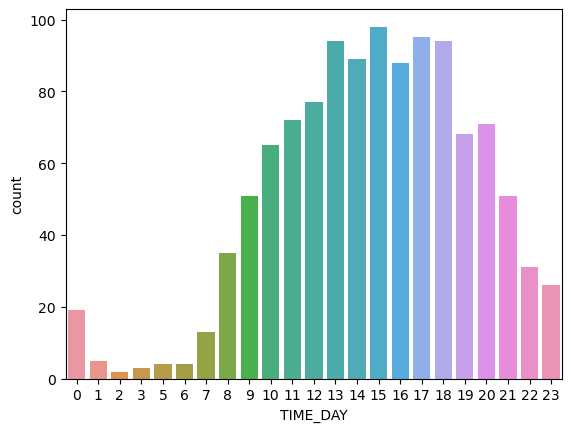

In [11]:
sns.countplot(x ='TIME_DAY', data = data)
plt.show()

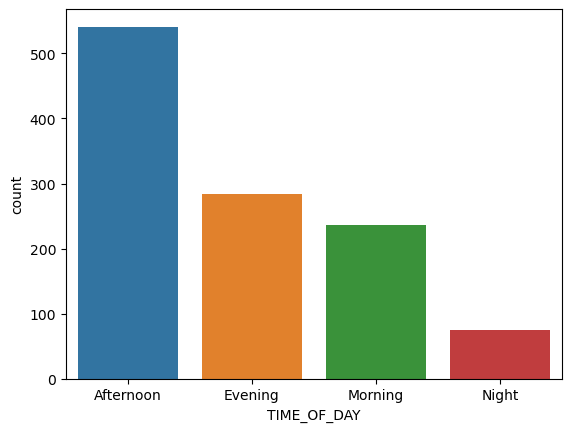

In [12]:
sns.countplot(x ='TIME_OF_DAY', data = data)
plt.show()

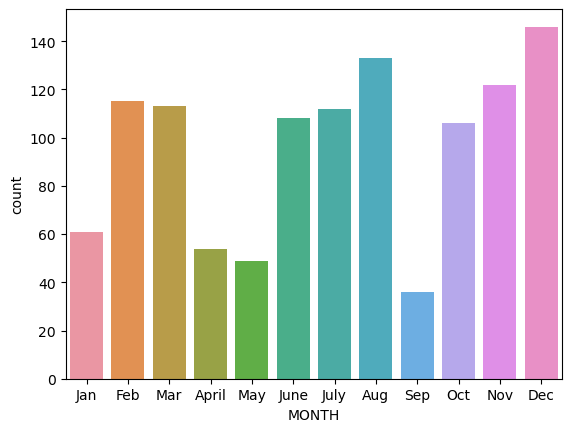

In [21]:
sns.countplot(x ='MONTH', data = data)
plt.show()

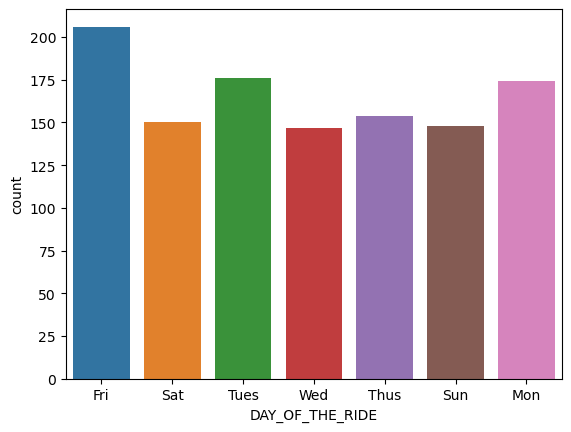

In [22]:
sns.countplot(x ='DAY_OF_THE_RIDE', data = data)
plt.show()

<Axes: title={'center': 'Top 10 START Locations'}, xlabel='index', ylabel='START'>

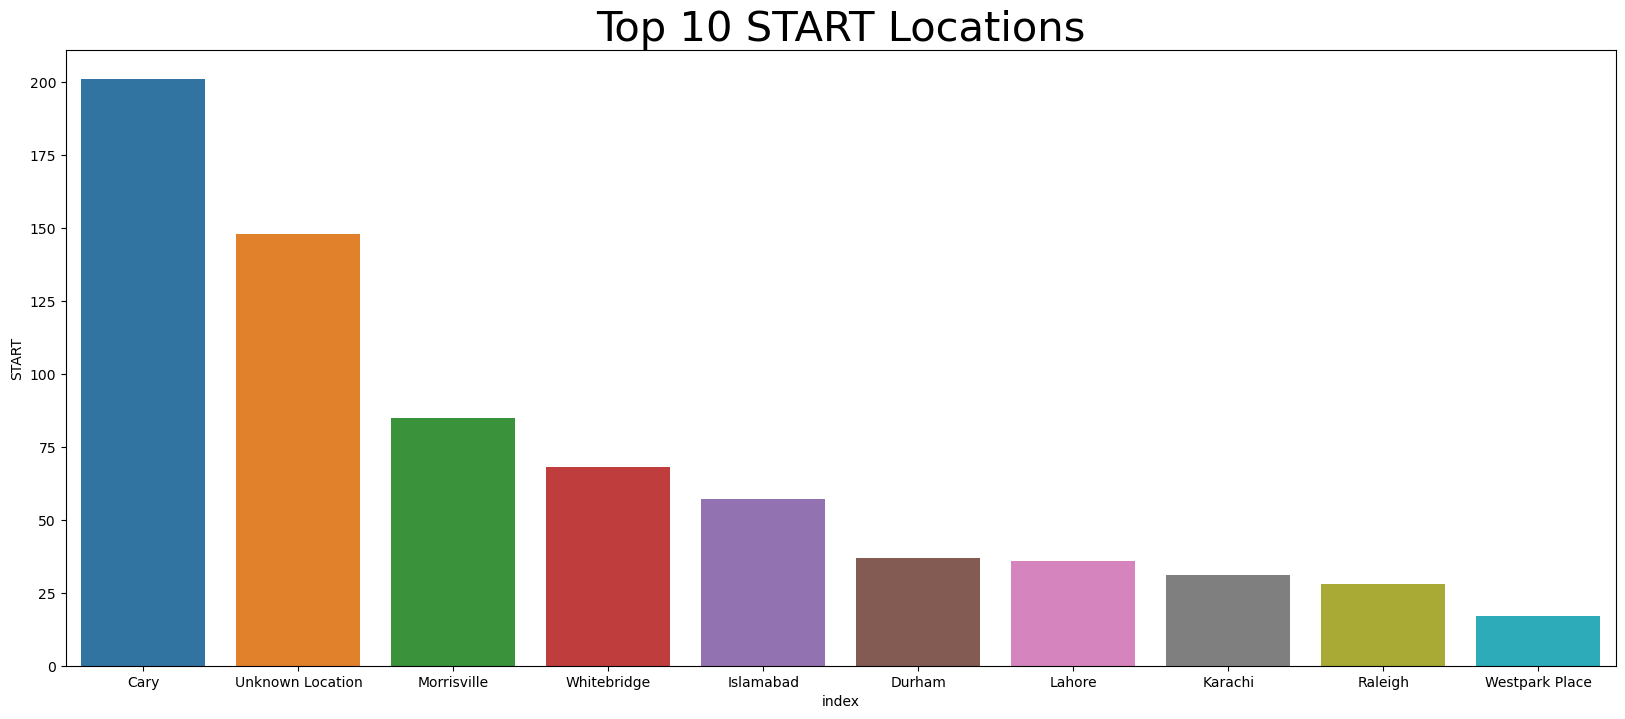

In [20]:
plt.figure(figsize = (20,8))
plt.title('Top 10 START Locations', fontsize=30)
temp = data['START'].value_counts().nlargest(10).reset_index()
sns.barplot(data=temp, x='index', y='START')

In [21]:
data['CATEGORY'] = data['CATEGORY'].astype('category')

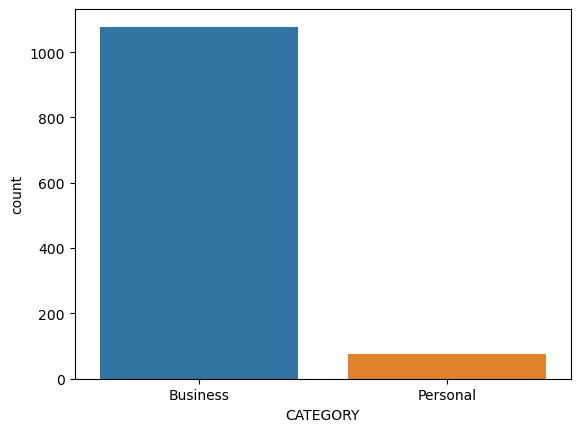

In [23]:
sns.countplot(x ='CATEGORY', data = data)
plt.show()

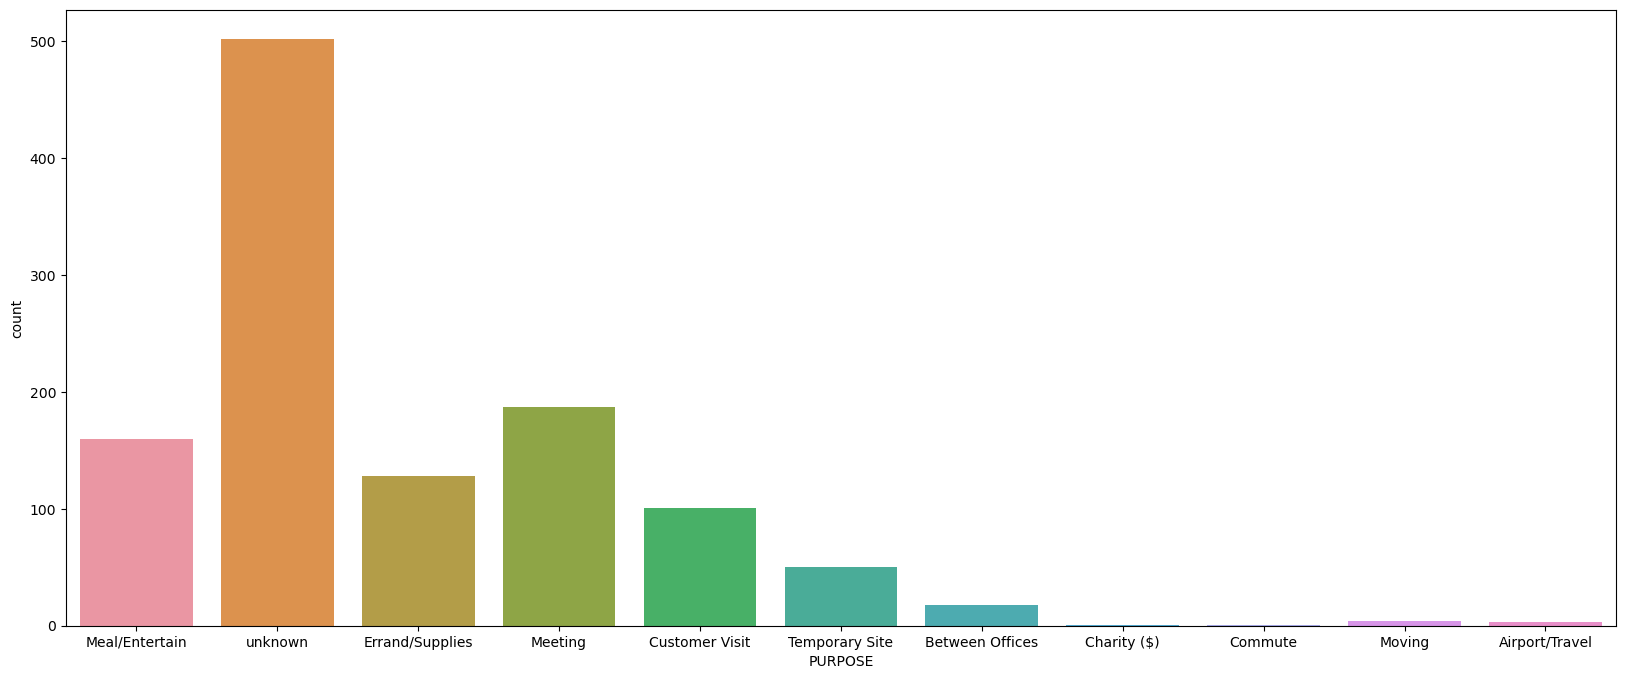

In [25]:
plt.figure(figsize = (20,8))
sns.countplot(x ='PURPOSE', data = data)
plt.show()